In [1]:
#Plot for the duopoly price discrimination model with loyalty and costs: Infinite horizon Mult Loyalty ML case
#this is applicable only for uniform F and when delta_a = delta_b = delta_F (hardcode)
#ta = la, tb = lb

%load_ext autoreload
%autoreload 2
from utils.imports import *
from utils.infinite_horizon import *
from utils.single_stage import get_xi_dist
from utils.utils import *

In [6]:
#keep cb fixed
cb     = 0.1
ta     =   3
tb     =   2
deltaf = 0.4 #common discount function
ca_arr = np.linspace(cb,1.4,50) #np.linspace(cb,2,50) #ensure ca >= cb
_,F,f    = get_xi_dist('uniform')
ca_m_cb_arr = ca_arr - cb

In [3]:
paa_arr,pba_arr,pbb_arr,pab_arr,xia_arr,xib_arr,constraint_aa_ba_arr,constraint_bb_ab_arr, \
    vaopt_diff_arr,vbopt_diff_arr = get_prices_xis_constraints_and_vs(ca_arr,cb,ta,tb,F,f,deltaf)

/Users/theja/miniconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


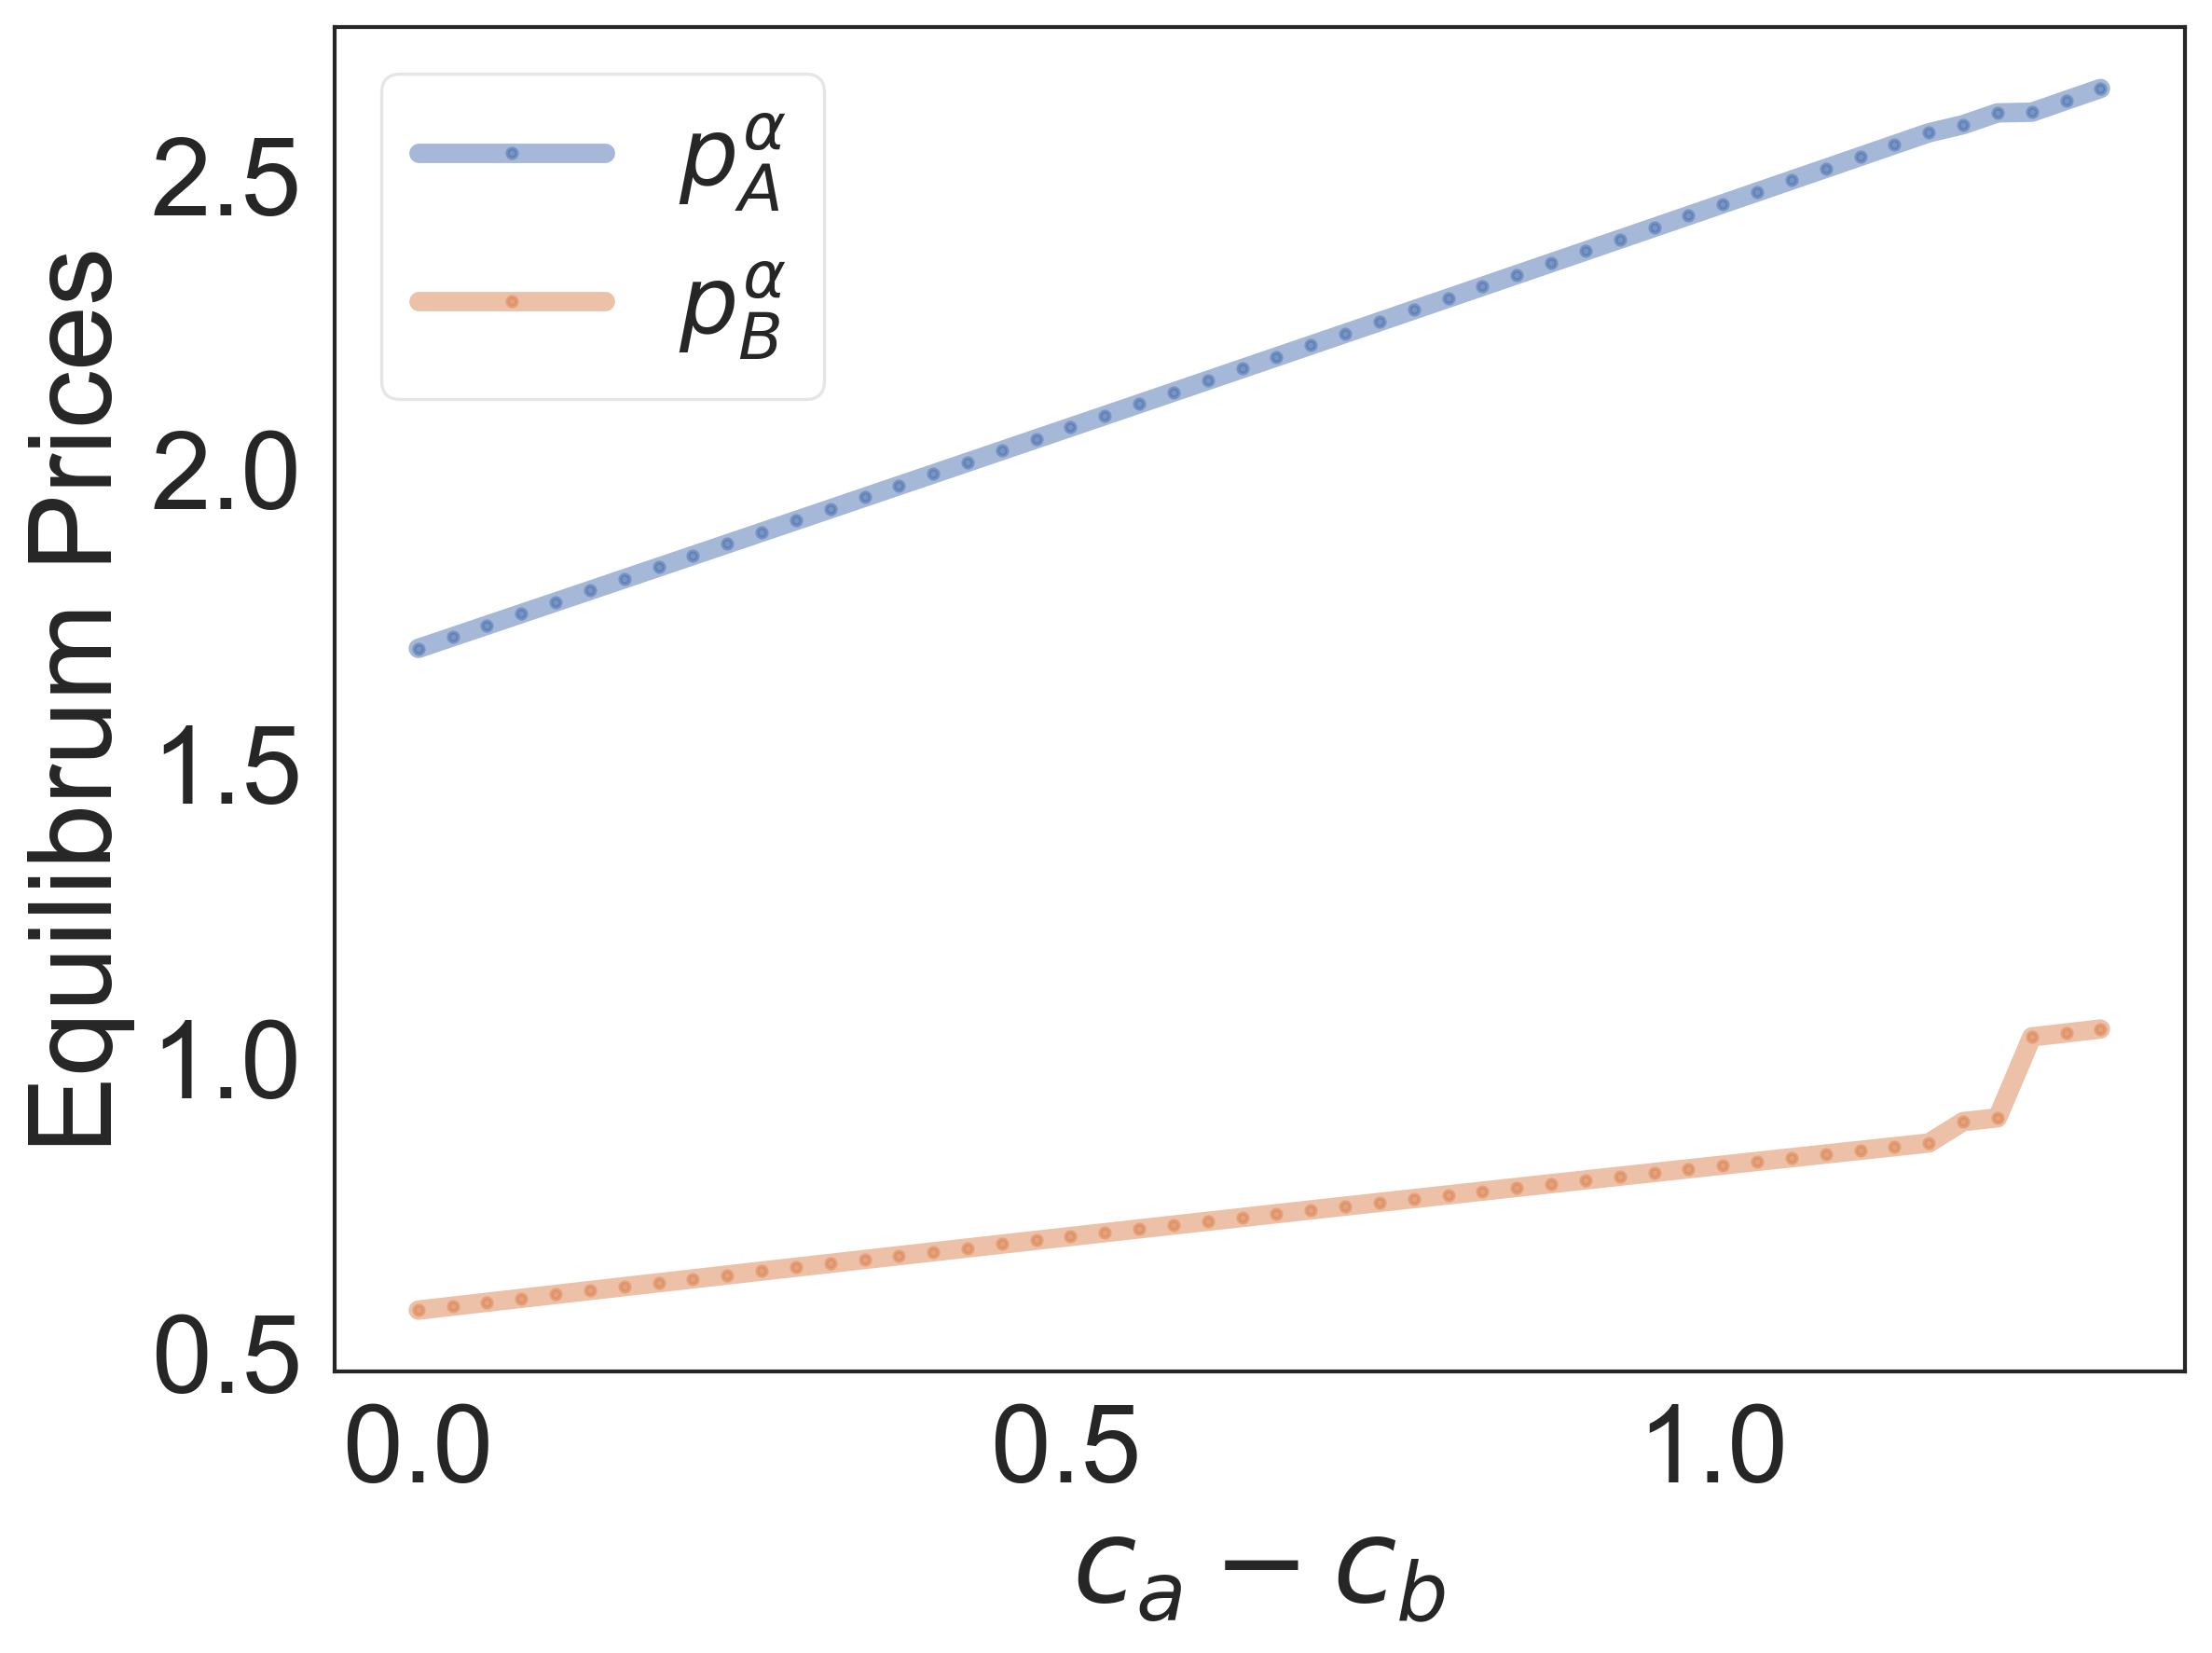

In [5]:
#plot
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)
pltsettings ={'linestyle':'-','marker':'.','alpha':0.5}
ax.plot(ca_m_cb_arr, paa_arr,**pltsettings,label=r'$p_{A}^{\alpha}$')
ax.plot(ca_m_cb_arr, pba_arr,**pltsettings,label=r'$p_{B}^{\alpha}$')
ax.set(xlabel=r'$c_a - c_b$', ylabel='Equilibrum Prices')
ax.legend(loc="upper left")
ax.grid()
plt.tight_layout()
#fig.savefig("ml_inf_horizon_csatisfied_paa_pba.png")
plt.show()

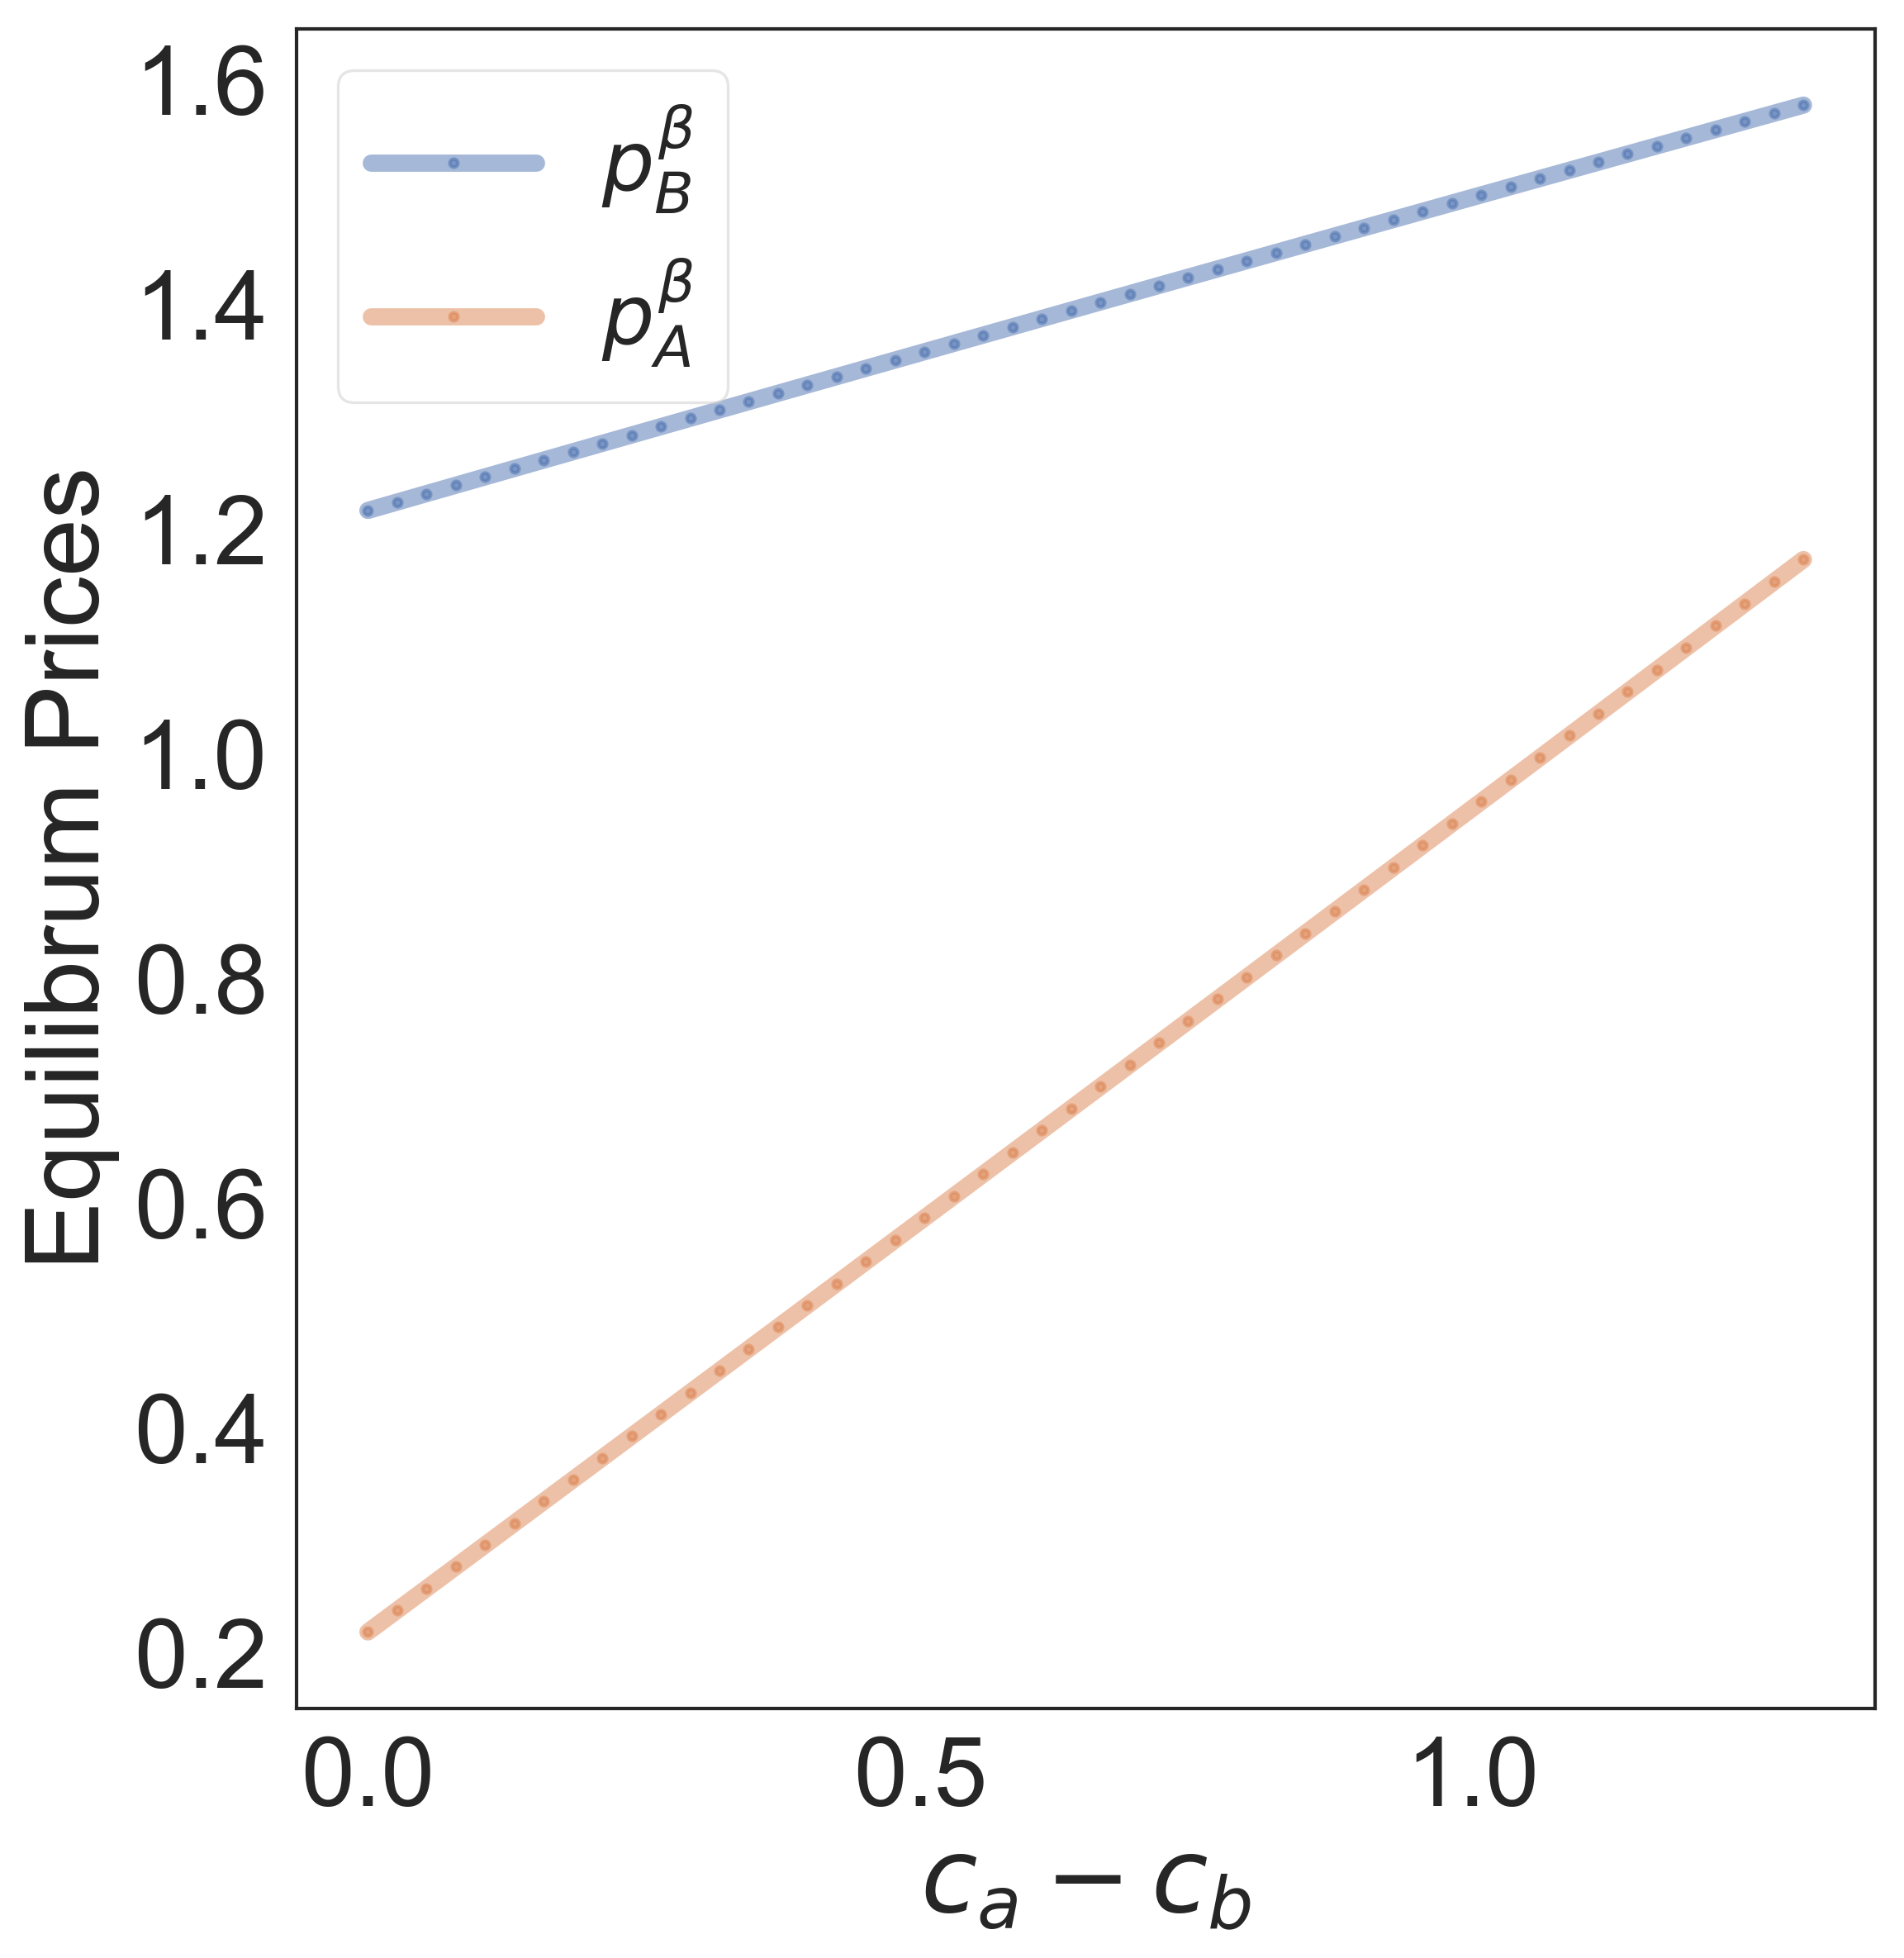

In [6]:
#plot
fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
ax.plot(ca_m_cb_arr, pbb_opt,**pltsettings,label=r'$p_{B}^{\beta}$')
ax.plot(ca_m_cb_arr, pab_opt,**pltsettings,label=r'$p_{A}^{\beta}$')
ax.set(xlabel=r'$c_a - c_b$', ylabel='Equilibrum Prices')
ax.legend(loc="best")
ax.grid()
plt.tight_layout()
fig.savefig("ml_inf_horizon_csatisfied_pbb_pab.png")
plt.show()

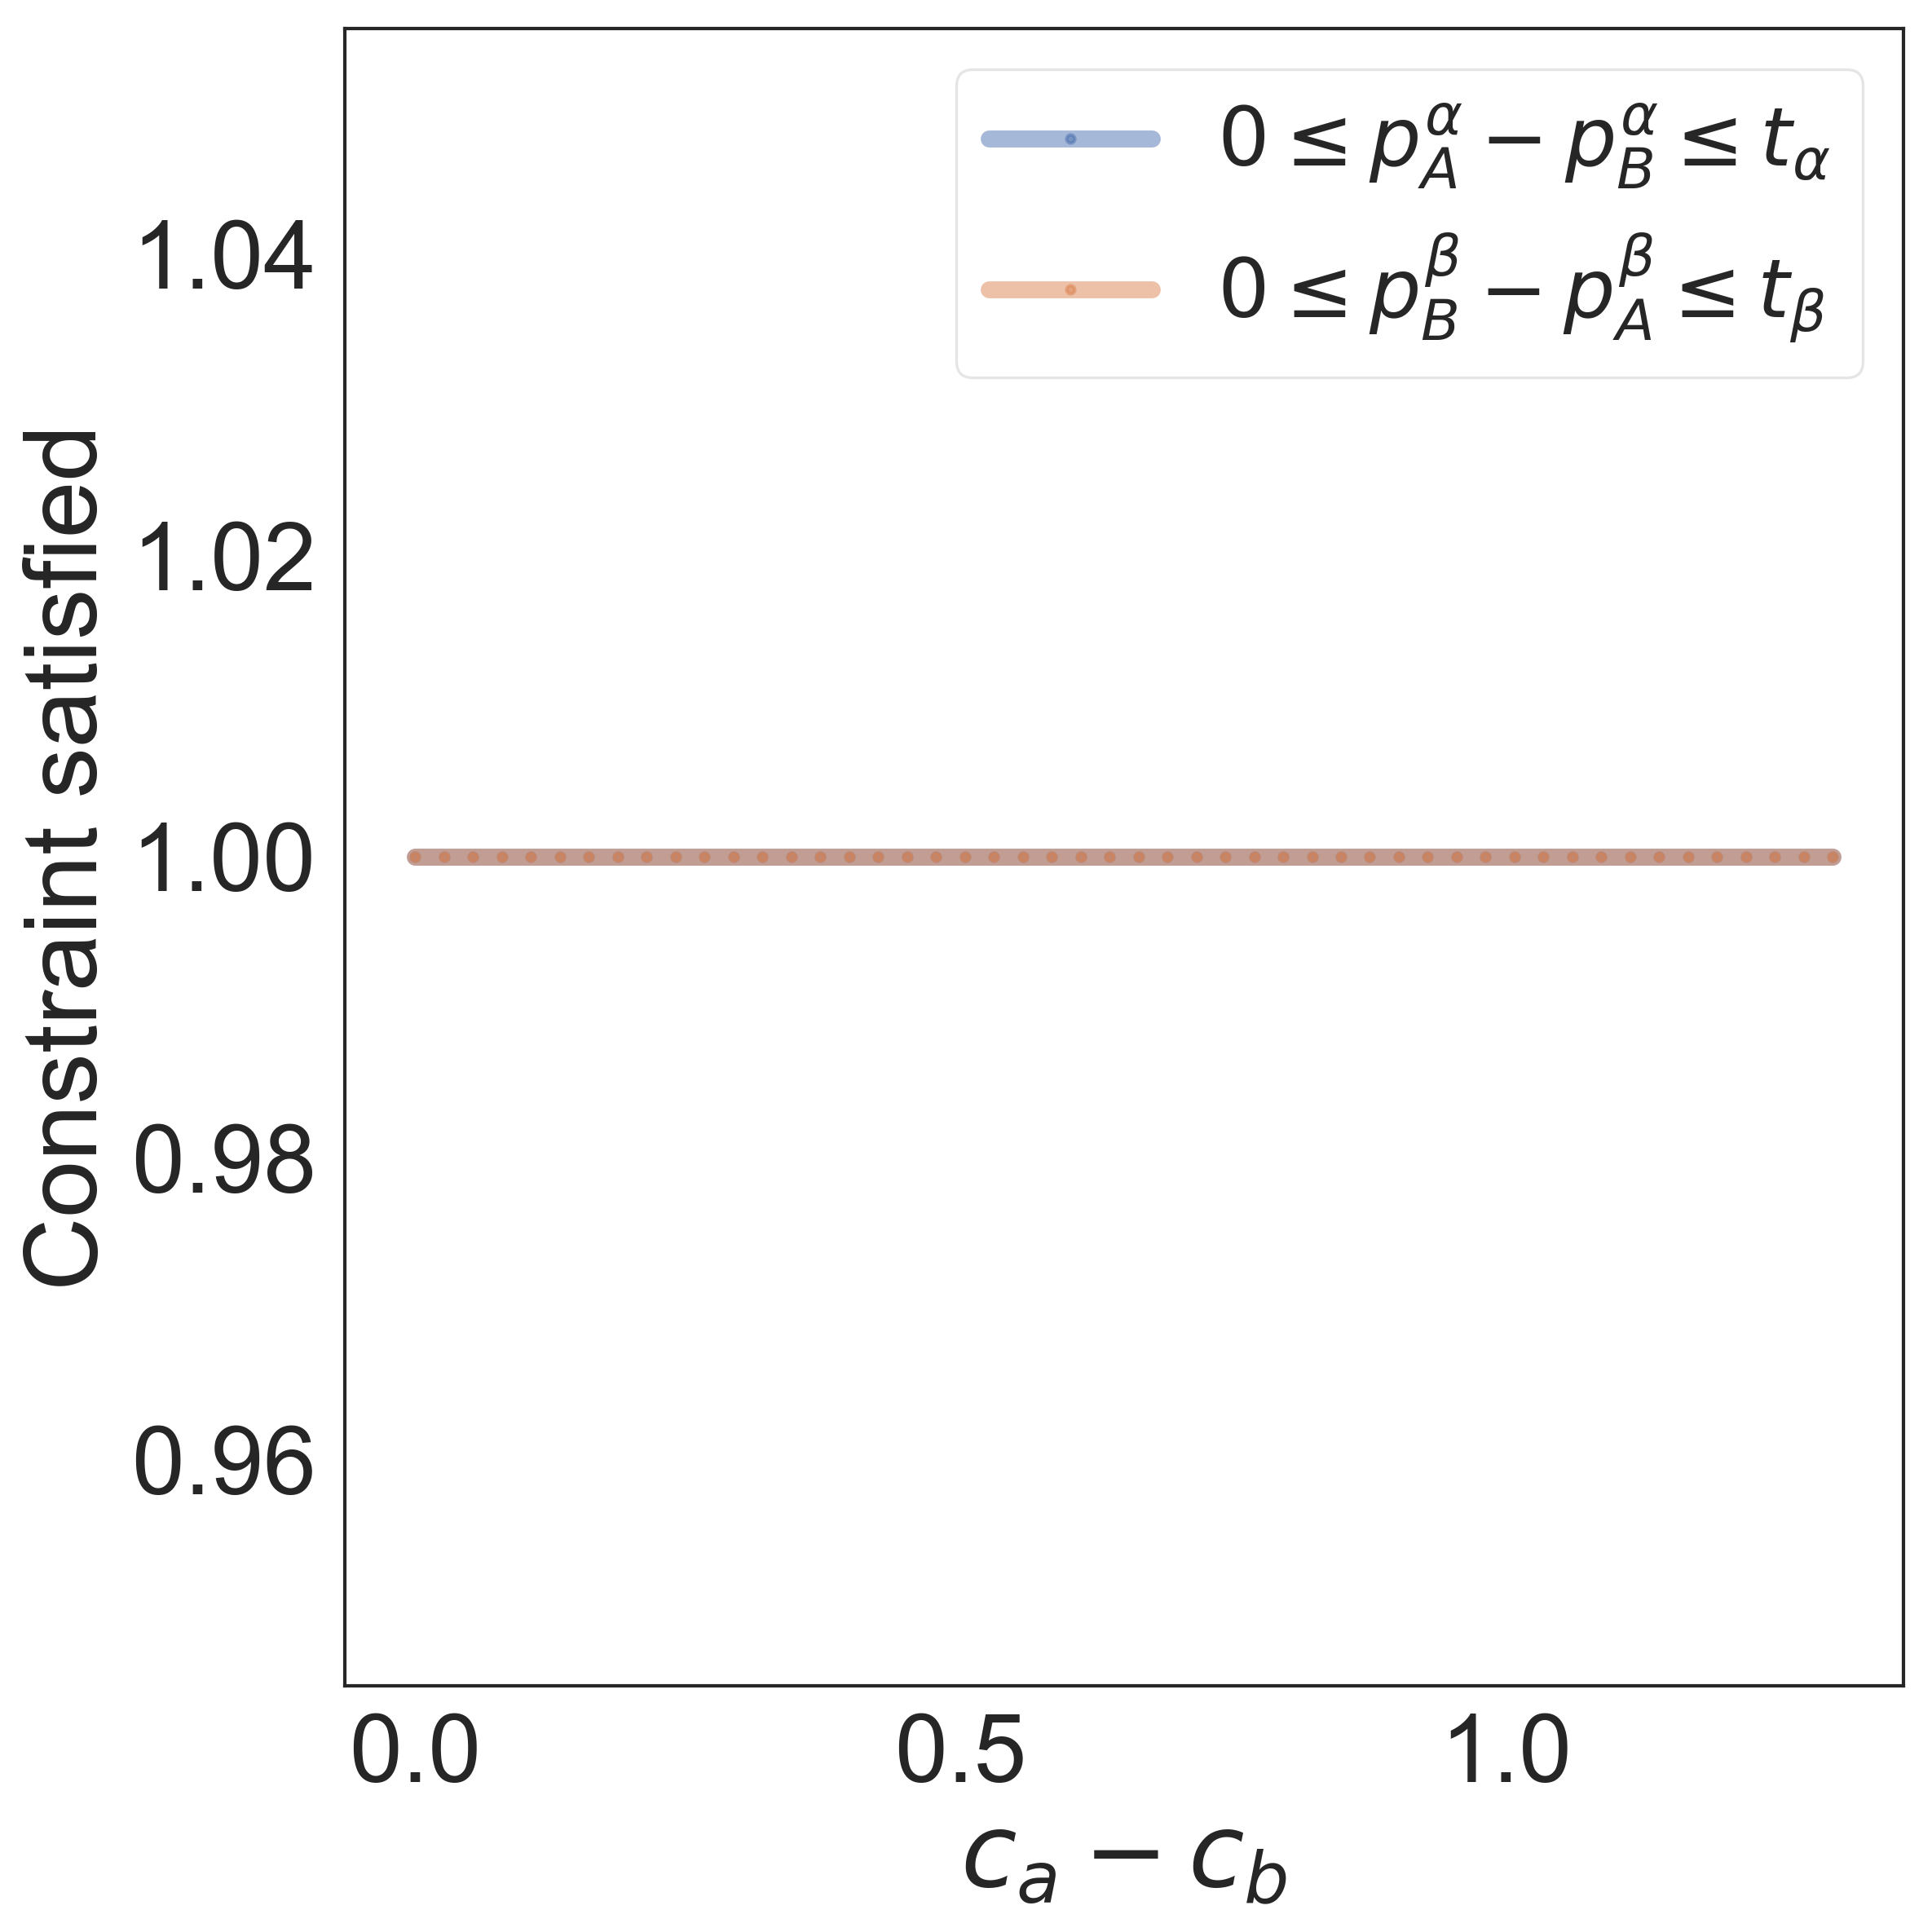

In [7]:
#plot
fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
ax.plot(ca_m_cb_arr, constraint_aa_ba,**pltsettings,label=r'$0 \leq p_{A}^{\alpha} - p_{B}^{\alpha} \leq t_{\alpha}$')
ax.plot(ca_m_cb_arr, constraint_bb_ab,**pltsettings,label=r'$0 \leq p_{B}^{\beta} - p_{A}^{\beta} \leq t_{\beta}$')
ax.set(xlabel=r'$c_a - c_b$', ylabel='Constraint satisfied')
ax.legend(loc="best")
ax.grid()
plt.tight_layout()
fig.savefig("ml_inf_horizon_csatisfied.png")
plt.show()

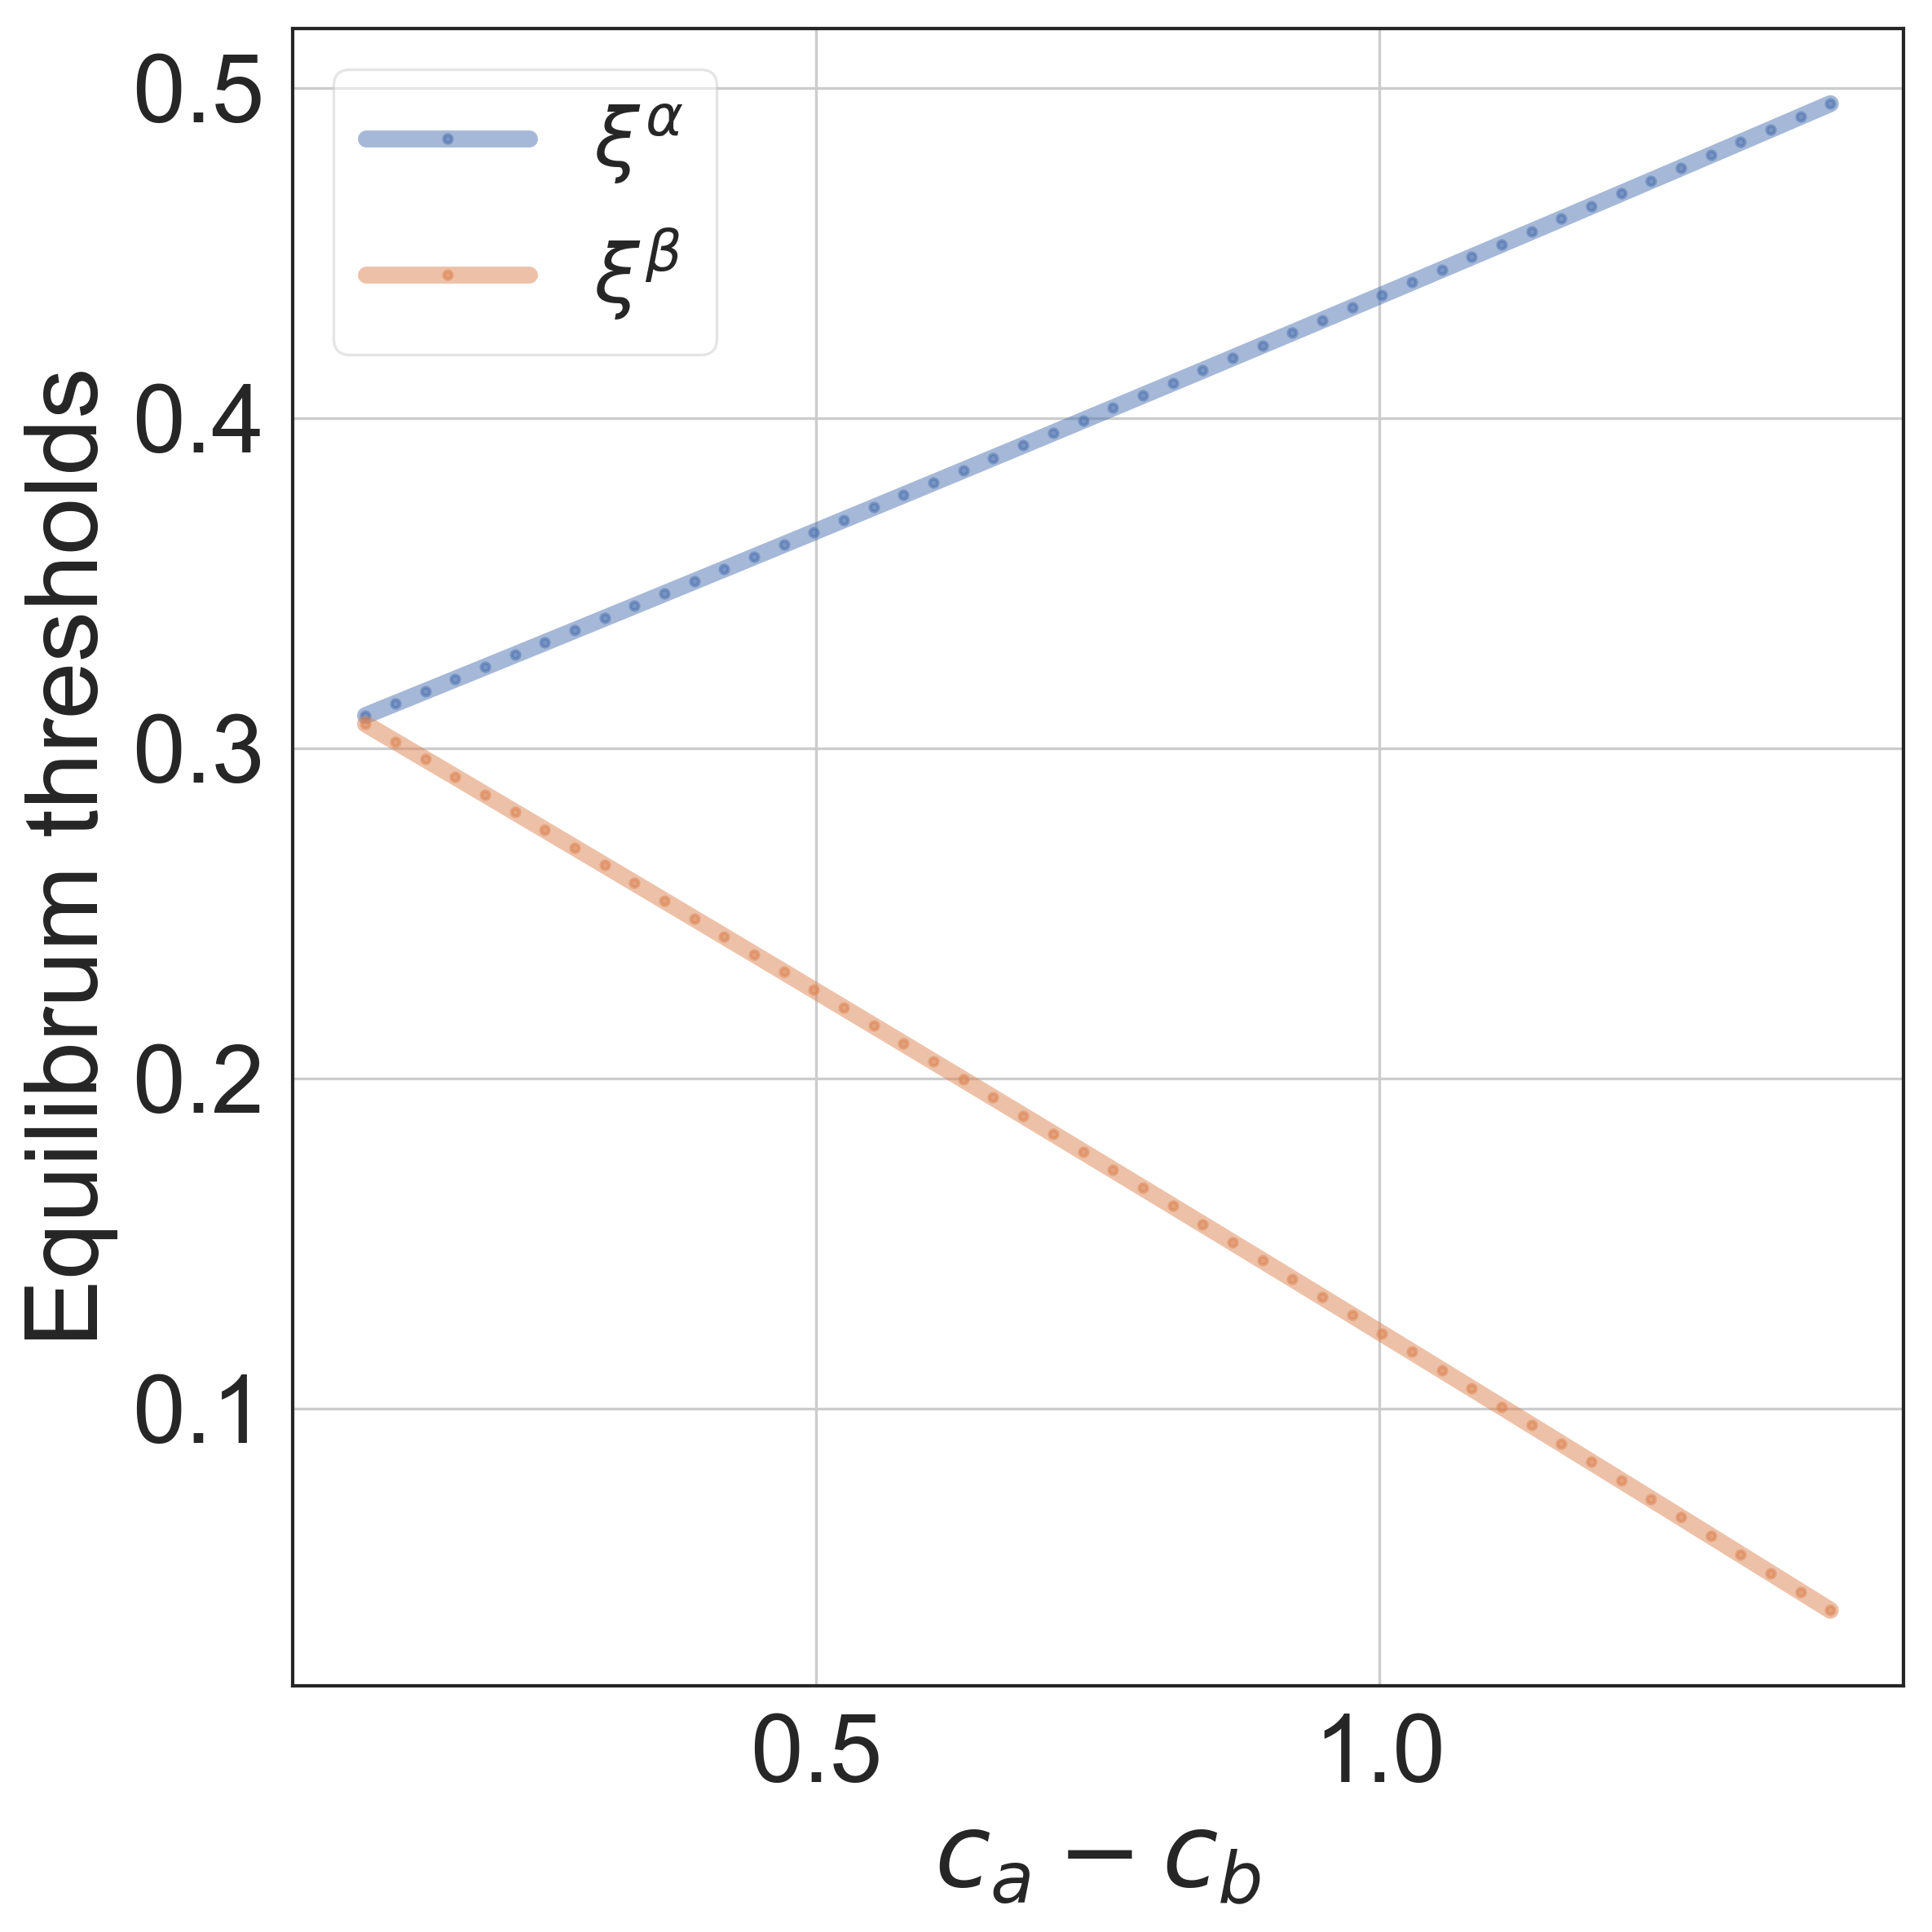

In [8]:
# plot of xia and xib
fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
line1, = ax.plot(ca_arr, xia_arr, **pltsettings, label=r'$\xi^{\alpha}$')
line2, = ax.plot(ca_arr, xib_arr, **pltsettings, label=r'$\xi^{\beta}$')
ax.legend(loc="best")
ax.set(xlabel=r'$c_a - c_b$', ylabel='Equilibrum thresholds')
plt.tight_layout()
fig.savefig("ml_inf_horizon_csatisfied_xia_xib.png")
plt.show()

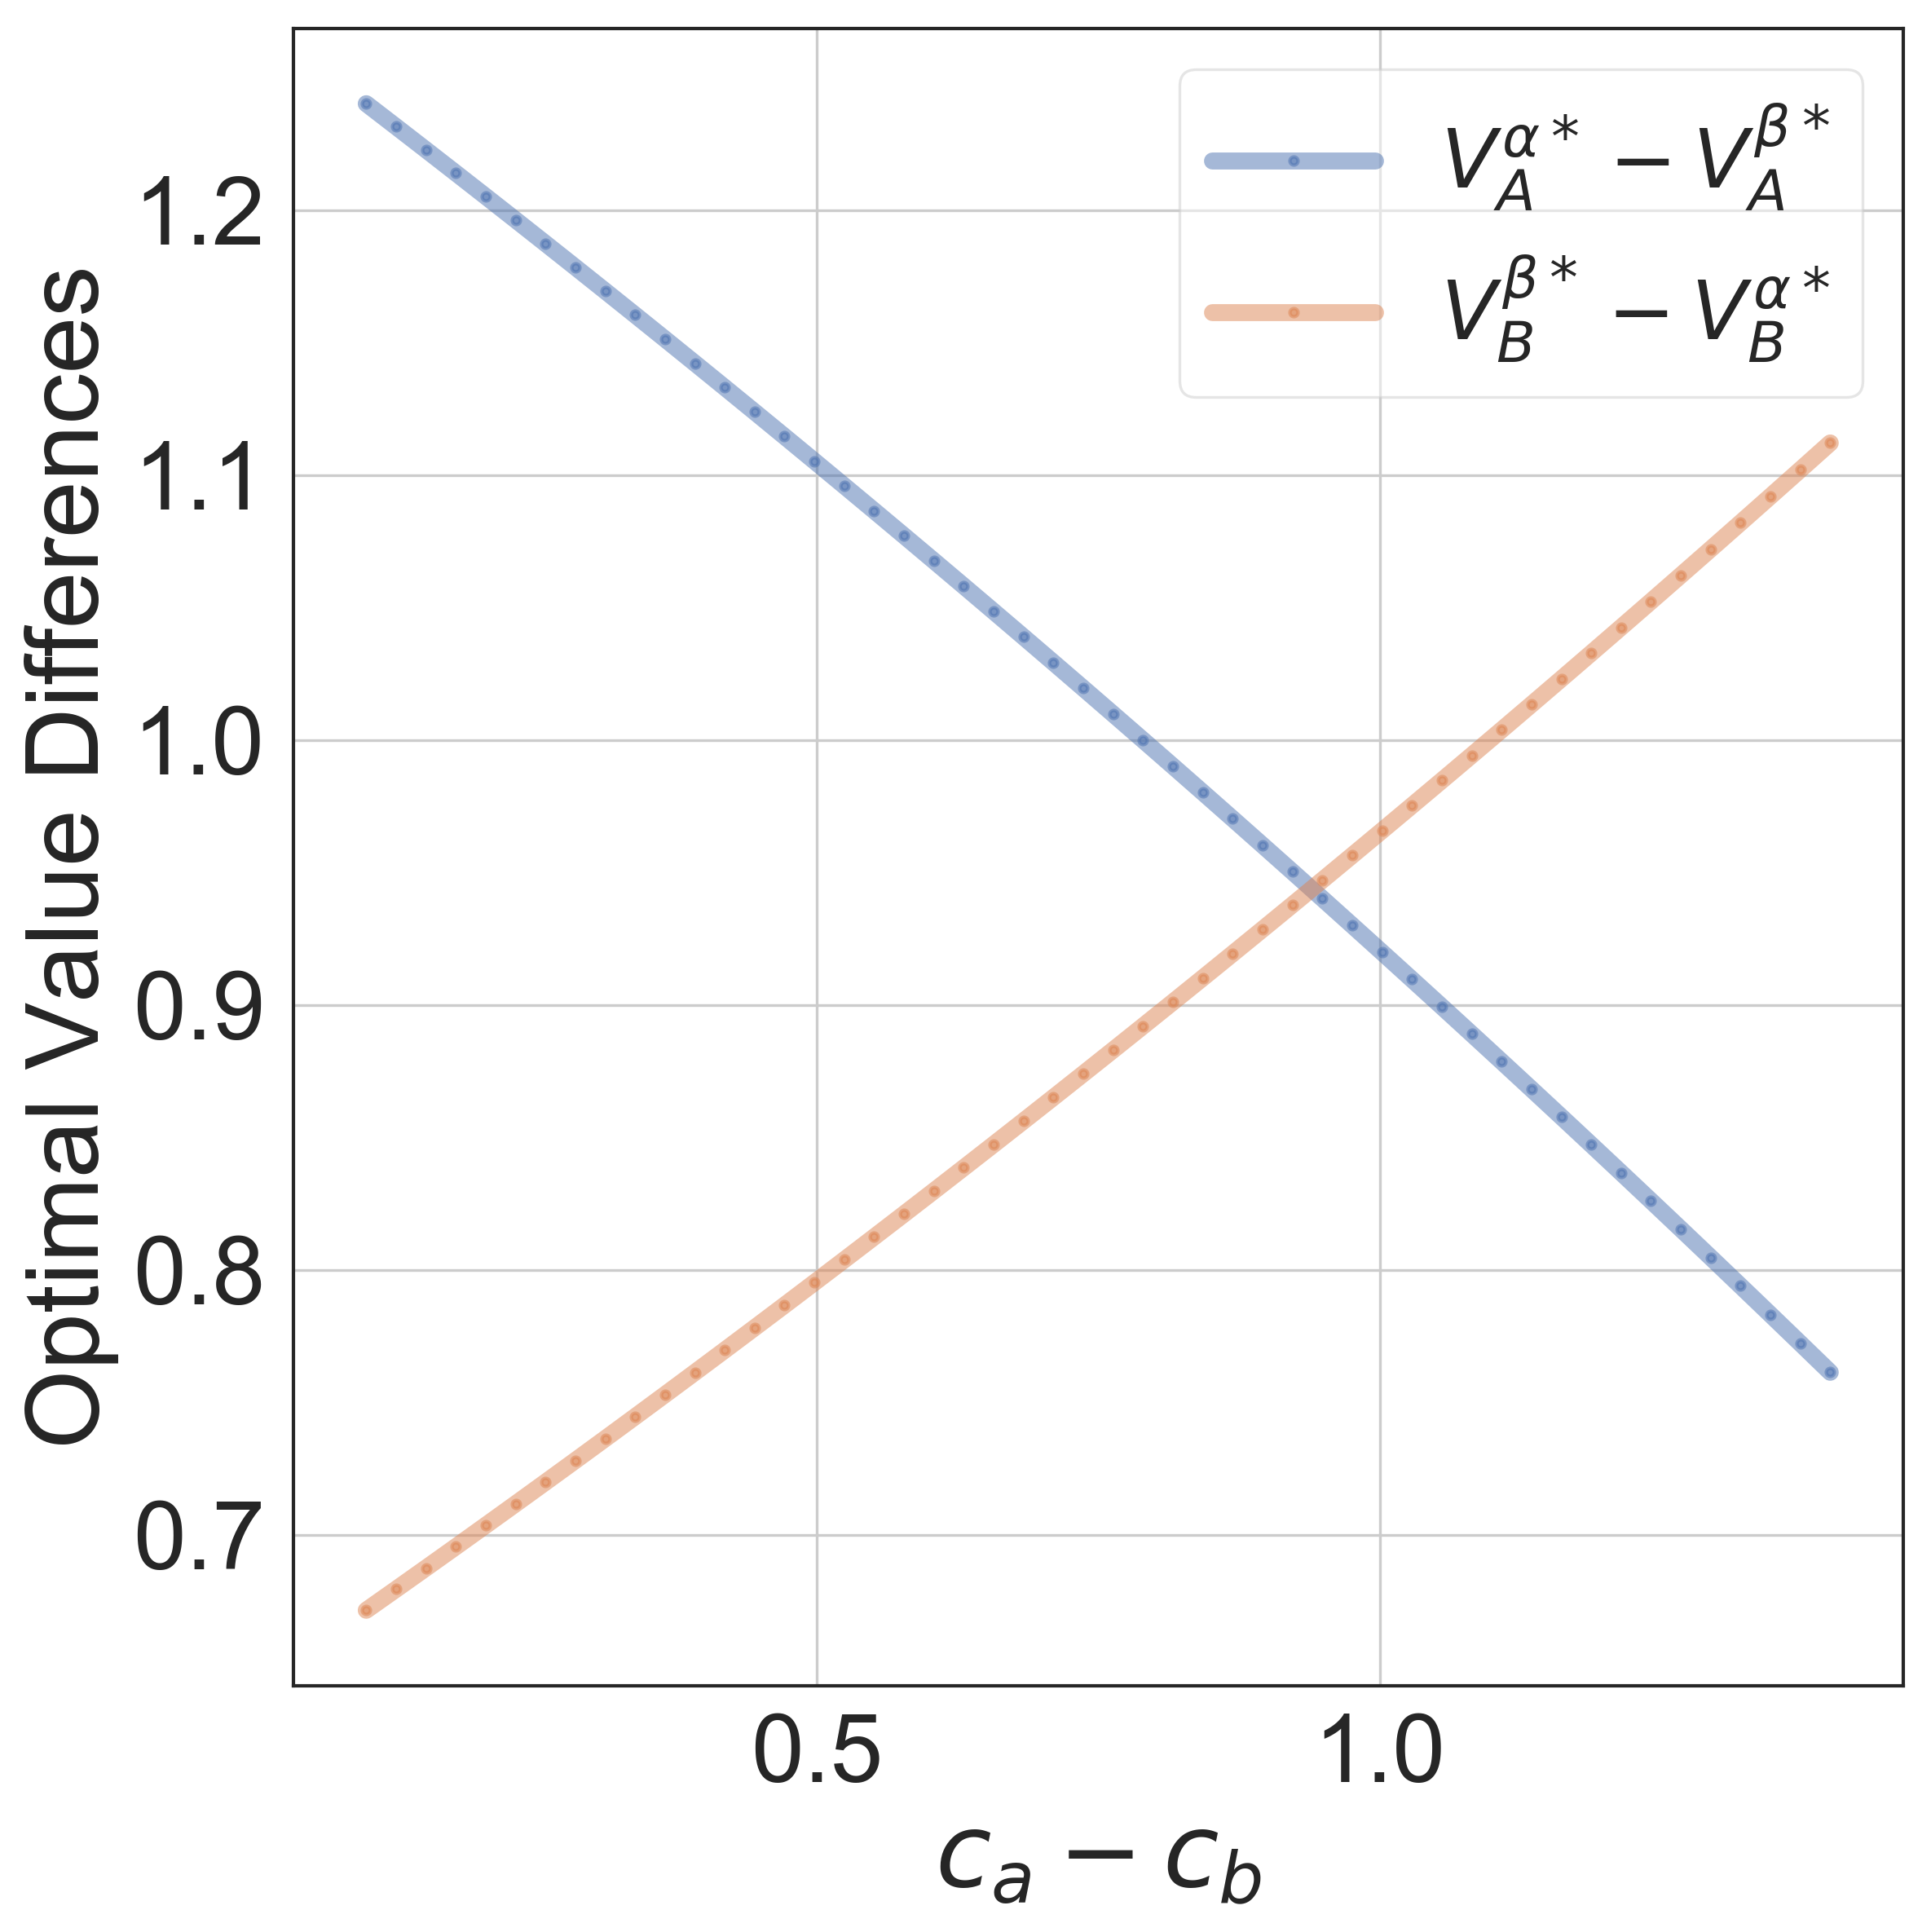

In [9]:
# plot of xia and xib
fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
line1, = ax.plot(ca_arr, vaopt_diff_arr, **pltsettings, label=r'$V_{A}^{\alpha*} - V_{A}^{\beta*}$')
line2, = ax.plot(ca_arr, vbopt_diff_arr, **pltsettings,  label=r'$V_{B}^{\beta*} - V_{B}^{\alpha*}$')
ax.legend(loc="best")
ax.set(xlabel=r'$c_a - c_b$', ylabel='Optimal Value Differences')
plt.tight_layout()
fig.savefig("ml_inf_horizon_csatisfied_vaoptdiff_vboptdiff.png")
plt.show()

In [10]:
#debugging the residual norms
debug = False
if debug is True:  
    ca    = 1
    cb    = 0.1
    ta    = 3
    tb    = 2
    maxpx = ca+3
    npts = 20
    deltaf = 0.4
    F,f    = get_xi_dist('uniform')
    xia,xib = fsolve(xi_equations, (0.5, 0.5),(ca,cb,ta,tb,F,f,deltaf))
    paa_arr = np.linspace(ca,maxpx,npts)
    pab_arr = np.linspace(ca,maxpx,npts)
    pbb_arr = np.linspace(cb,maxpx,npts)
    pba_arr = np.linspace(cb,maxpx,npts)
    obja = np.zeros((paa_arr.size,pba_arr.size))
    objb = np.zeros((paa_arr.size,pba_arr.size))
    constraintmat = np.zeros((paa_arr.size,pba_arr.size))

    for i,paa in enumerate(paa_arr):
        print("i",i)
        for j,pba in enumerate(pba_arr):
            for k,pbb in enumerate(pbb_arr):
                for l,pab in enumerate(pab_arr):
                    if constraints(paa,pba,ca,cb,ta) and constraints(pbb,pab,ca,cb,tb):
                        constraintmat[i,j] = 1 
                        obja[i,l] = np.linalg.norm(np.array(pax_equations((paa,pab),xia,xib,ca,cb,ta,tb,F,f,deltaf)))
                        objb[k,j] = np.linalg.norm(np.array(pbx_equations((pbb,pba),xia,xib,ca,cb,ta,tb,F,f,deltaf)))

In [11]:
if debug is True:  
    fig = make_subplots(rows=1, cols=2)
    fig.add_trace(go.Contour( z=obja, x=pab_arr, y=paa_arr), row=1, col=1)
    fig.add_trace(go.Contour( z=objb, x=pba_arr, y=pbb_arr), row=1, col=2)
    fig.update_layout(height=600, width=800, title_text="Contour plots of the residual landscape")
    fig.show()

In [12]:
# if debug is True:  
#     fig = go.Figure(data=[go.Surface(z=obja, x=pab_arr, y=paa_arr)])
#     fig.update_layout(autosize=False, width=500, height=500, margin=dict(l=65, r=50, b=65, t=90), scene = dict(xaxis = dict(title='pba'),yaxis = dict(title='paa')))
#     fig.show()

In [13]:
# if debug is True:  
#     fig = go.Figure(data=[go.Surface(z=objb, x=pba_arr, y=pbb_arr)])
#     fig.update_layout(autosize=False, width=500, height=500, margin=dict(l=65, r=50, b=65, t=90), scene = dict(xaxis = dict(title='pba'),yaxis = dict(title='paa')))
#     fig.show()

In [14]:
#slope and intercepts
def reg_objective(candidates,ca_arr,p_arr):
    m,c = candidates
    residual_vec = m*ca_arr + c - p_arr
    return np.linalg.norm(residual_vec)**2
res_aa = minimize(reg_objective, (0.5, 0.5),args=(ca_arr,paa_opt))
res_ab = minimize(reg_objective, (0.5, 0.5),args=(ca_arr,pab_opt))
res_bb = minimize(reg_objective, (0.5, 0.5),args=(ca_arr,pbb_opt))
res_ba = minimize(reg_objective, (0.5, 0.5),args=(ca_arr,pba_opt))
print(res_aa.x,res_ab.x,res_bb.x,res_ba.x)

[0.7195239  1.60156137] [0.73421371 0.14402087] [0.27753814 1.18994673] [0.29222796 0.73240621]
